In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
TRAIN_PATH = './C:/Users/skltsd/Anaconda_HW/Нейронные сети/9ЛР/fashion-mnist_train.csv'
TEST_PATH = './C:/Users/skltsd/Anaconda_HW/Нейронные сети/9ЛР/fashion-mnist_test.csv'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) 
])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32*7*7, 128)  
        self.fc2 = nn.Linear(128, 10)     
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32*7*7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleCNN()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

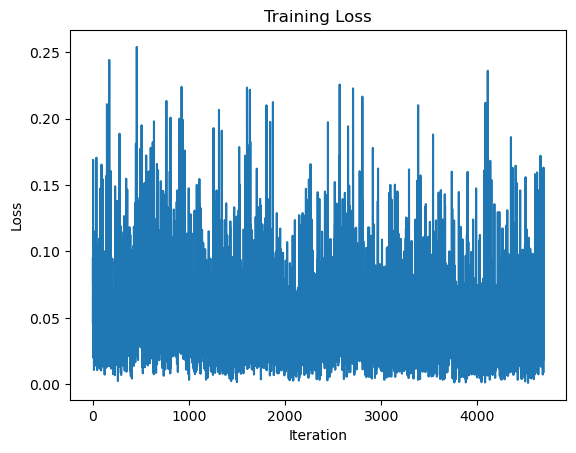

Accuracy on test set: 91.42%


In [16]:
loss_list = []

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')